# Full linear ridge simulations

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import aux
from db.d_models import LinRidgeTrial
from lin_ridge import full
from lin_ridge import full_global as C
from lin_ridge import search_global as C_
from lin_ridge.full_viz import raster
from lin_ridge.viz import select_trials
from plot import set_font_size

import PARAMETERS as P

In [2]:
# load pre-computed files
pre = {
    'w_n_pc_ec_vs_dist': aux.load(C_.PATH_W_N_PC_EC_VS_DIST),
    'v_g_n_vs_w_n_pc_ec_fr_ec': aux.load(C_.PATH_V_G_N_VS_W_N_PC_EC_FR_EC),
}

Select replay-only trials we want to run full smlns for.

In [3]:
T = LinRidgeTrial

trials = select_trials(
    smln_id='smln_2', filt=[
        T.stability > 0.5, T.speed < 10, T.angle < 0.3, T.id != 25381, T.id != 25450
    ], lmt=3)
trials

,id,searcher_id,seed,area_h,area_w,ridge_y,p_inh,rho_pc,z_pc,l_pc,w_a_pc_pc,p_a_inh_pc,w_a_inh_pc,p_g_pc_inh,w_g_pc_inh,fr_ec,stability,angle,activity,speed
0,25438,25,9394,0.5,2.0,-0.125,0.102050,12868.838831,0.985682,0.022155,0.007733,0.083637,0.002514,0.009592,0.014411,36.058473,0.666667,0.069797,2.296825,9.555461
1,25533,26,1019,0.5,2.0,-0.125,0.101520,12750.774731,1.010758,0.022690,0.008340,0.082301,0.002896,0.008015,0.014779,36.106640,0.666667,0.049193,2.547933,9.713865
2,25482,25,7827,0.5,2.0,-0.125,0.102192,12862.915476,0.985425,0.022166,0.007744,0.083710,0.002502,0.009559,0.014422,36.056736,0.666667,0.041391,2.498023,9.734511


Run full smlns.

In [4]:
N_REPEATS = 2

commit = input(
    'Please commit relevant files and enter commit id (or "q" to quit): ')

if commit.lower() == 'q':
    raise KeyboardInterrupt('Execution halted by user.')

for trial_id in trials['id']:
    
    print('Trial {}:'.format(trial_id))
    
    for ctr in range(N_REPEATS):
        print('    repeat {}...'.format(ctr+1))
        
        seed = np.random.randint(0, C.MAX_SEED)
        rsp = full.run_smln(int(trial_id), LinRidgeTrial, pre, C, P, C_, save=True, seed=seed, commit=commit)
        
        # save response for later
        aux.save('lin_ridge/cache/full_smln_rsp_trial_{}_seed_{}.npy'.format(trial_id, seed), rsp)
        
        # make raster plot
        fig, axs = raster(rsp.ts, rsp.spks, rsp.pfcs, rsp.cell_types, rsp.p, C, C_, fig_size=(15, 9))
        
        axs[0].set_title(
            'Trial {0}: repeat {1}\n(replay_fr = {2:.4f}, '
            'fr_min = {3:.4f}, fr_max = {4:.4f}'.format(
                trial_id, ctr+1, rsp.trial.replay_fr, rsp.trial.replay_fr_min, rsp.trial.replay_fr_max))
        
        for ax in axs:
            set_font_size(ax, 16)
            
        # clear up memory
        rsp = None

Please commit relevant files and enter commit id (or "q" to quit): 6a688491a19fc9ca76f83f6486db4ba8b3750c71
Trial 25438:
    repeat 1...
Running full smln...
6/38600 steps completed after 37.243 s...
11/38600 steps completed after 74.483 s...
16/38600 steps completed after 111.702 s...
21/38600 steps completed after 148.997 s...
26/38600 steps completed after 186.237 s...
31/38600 steps completed after 223.453 s...
36/38600 steps completed after 260.736 s...
41/38600 steps completed after 297.952 s...
46/38600 steps completed after 335.183 s...
51/38600 steps completed after 372.436 s...
56/38600 steps completed after 409.675 s...
61/38600 steps completed after 446.888 s...
66/38600 steps completed after 484.101 s...
71/38600 steps completed after 521.366 s...
76/38600 steps completed after 558.578 s...
81/38600 steps completed after 595.774 s...
86/38600 steps completed after 633.031 s...
91/38600 steps completed after 670.252 s...
96/38600 steps completed after 707.456 s...
101/38600

886/38600 steps completed after 6589.986 s...
891/38600 steps completed after 6627.281 s...
896/38600 steps completed after 6664.543 s...
901/38600 steps completed after 6701.754 s...
906/38600 steps completed after 6739.055 s...
911/38600 steps completed after 6776.331 s...
916/38600 steps completed after 6813.548 s...
921/38600 steps completed after 6850.786 s...
926/38600 steps completed after 6888.054 s...
931/38600 steps completed after 6925.296 s...
936/38600 steps completed after 6962.518 s...
941/38600 steps completed after 6999.769 s...
946/38600 steps completed after 7036.978 s...
951/38600 steps completed after 7074.181 s...
956/38600 steps completed after 7111.440 s...
961/38600 steps completed after 7148.652 s...
966/38600 steps completed after 7185.889 s...
971/38600 steps completed after 7223.171 s...
976/38600 steps completed after 7260.391 s...
981/38600 steps completed after 7297.604 s...
986/38600 steps completed after 7334.860 s...
991/38600 steps completed after 73

1652/38600 steps completed after 12449.968 s...
1656/38600 steps completed after 12481.296 s...
1660/38600 steps completed after 12512.639 s...
1664/38600 steps completed after 12543.946 s...
1668/38600 steps completed after 12575.250 s...
1672/38600 steps completed after 12606.575 s...
1676/38600 steps completed after 12637.898 s...
1680/38600 steps completed after 12669.223 s...
1684/38600 steps completed after 12700.526 s...
1688/38600 steps completed after 12731.851 s...
1692/38600 steps completed after 12763.187 s...
1696/38600 steps completed after 12794.492 s...
1700/38600 steps completed after 12825.824 s...
1704/38600 steps completed after 12857.145 s...
1708/38600 steps completed after 12888.468 s...
1712/38600 steps completed after 12919.774 s...
1716/38600 steps completed after 12951.087 s...
1720/38600 steps completed after 12982.444 s...
1724/38600 steps completed after 13013.761 s...
1728/38600 steps completed after 13045.073 s...
1732/38600 steps completed after 13076.3

2336/38600 steps completed after 17808.049 s...
2340/38600 steps completed after 17839.370 s...
2344/38600 steps completed after 17870.689 s...
2348/38600 steps completed after 17901.995 s...
2352/38600 steps completed after 17933.296 s...
2356/38600 steps completed after 17964.654 s...
2360/38600 steps completed after 17995.962 s...
2364/38600 steps completed after 18027.280 s...
2368/38600 steps completed after 18058.603 s...
2372/38600 steps completed after 18089.927 s...
2376/38600 steps completed after 18121.257 s...
2380/38600 steps completed after 18152.562 s...
2384/38600 steps completed after 18183.899 s...
2388/38600 steps completed after 18215.201 s...
2392/38600 steps completed after 18246.505 s...
2396/38600 steps completed after 18277.827 s...
2400/38600 steps completed after 18309.144 s...
2404/38600 steps completed after 18340.467 s...
2408/38600 steps completed after 18371.777 s...
2412/38600 steps completed after 18403.092 s...
2416/38600 steps completed after 18434.5

3020/38600 steps completed after 23165.808 s...
3024/38600 steps completed after 23197.143 s...
3028/38600 steps completed after 23228.490 s...
3032/38600 steps completed after 23259.810 s...
3036/38600 steps completed after 23291.164 s...
3040/38600 steps completed after 23322.508 s...
3044/38600 steps completed after 23353.835 s...
3048/38600 steps completed after 23385.143 s...
3052/38600 steps completed after 23416.450 s...
3056/38600 steps completed after 23447.767 s...
3060/38600 steps completed after 23479.122 s...
3064/38600 steps completed after 23510.437 s...
3068/38600 steps completed after 23541.780 s...
3072/38600 steps completed after 23573.113 s...
3076/38600 steps completed after 23604.434 s...
3080/38600 steps completed after 23635.764 s...
3084/38600 steps completed after 23667.074 s...
3088/38600 steps completed after 23698.399 s...
3092/38600 steps completed after 23729.715 s...
3096/38600 steps completed after 23761.035 s...
3100/38600 steps completed after 23792.3

3704/38600 steps completed after 28523.065 s...
3708/38600 steps completed after 28554.382 s...
3712/38600 steps completed after 28585.719 s...
3716/38600 steps completed after 28617.027 s...
3720/38600 steps completed after 28648.331 s...
3724/38600 steps completed after 28679.665 s...
3728/38600 steps completed after 28710.974 s...
3732/38600 steps completed after 28742.295 s...
3736/38600 steps completed after 28773.604 s...
3740/38600 steps completed after 28804.925 s...
3744/38600 steps completed after 28836.243 s...
3748/38600 steps completed after 28867.547 s...
3752/38600 steps completed after 28898.877 s...
3756/38600 steps completed after 28930.182 s...
3760/38600 steps completed after 28961.488 s...
3764/38600 steps completed after 28992.809 s...
3768/38600 steps completed after 29024.133 s...
3772/38600 steps completed after 29055.445 s...
3776/38600 steps completed after 29086.760 s...
3780/38600 steps completed after 29118.073 s...
3784/38600 steps completed after 29149.4

4388/38600 steps completed after 33887.655 s...
4392/38600 steps completed after 33918.963 s...
4396/38600 steps completed after 33950.299 s...
4400/38600 steps completed after 33981.617 s...
4404/38600 steps completed after 34012.925 s...
4408/38600 steps completed after 34044.245 s...
4412/38600 steps completed after 34075.572 s...
4416/38600 steps completed after 34106.914 s...
4420/38600 steps completed after 34138.220 s...
4424/38600 steps completed after 34169.528 s...
4428/38600 steps completed after 34200.872 s...
4432/38600 steps completed after 34232.179 s...
4436/38600 steps completed after 34263.505 s...
4440/38600 steps completed after 34294.818 s...
4444/38600 steps completed after 34326.135 s...
4448/38600 steps completed after 34357.457 s...
4452/38600 steps completed after 34388.762 s...
4456/38600 steps completed after 34420.099 s...
4460/38600 steps completed after 34451.406 s...
4464/38600 steps completed after 34482.713 s...
4468/38600 steps completed after 34514.0

5072/38600 steps completed after 39243.544 s...
5076/38600 steps completed after 39274.855 s...
5080/38600 steps completed after 39306.205 s...
5084/38600 steps completed after 39337.532 s...
5088/38600 steps completed after 39368.838 s...
5092/38600 steps completed after 39400.167 s...
5096/38600 steps completed after 39431.505 s...
5100/38600 steps completed after 39462.849 s...
5104/38600 steps completed after 39494.155 s...
5108/38600 steps completed after 39525.468 s...
5112/38600 steps completed after 39556.793 s...
5116/38600 steps completed after 39588.119 s...
5120/38600 steps completed after 39619.446 s...
5124/38600 steps completed after 39650.751 s...
5128/38600 steps completed after 39682.058 s...
5132/38600 steps completed after 39713.390 s...
5136/38600 steps completed after 39744.698 s...
5140/38600 steps completed after 39776.014 s...
5144/38600 steps completed after 39807.325 s...
5148/38600 steps completed after 39838.654 s...
5152/38600 steps completed after 39869.9

5756/38600 steps completed after 44599.483 s...
5760/38600 steps completed after 44630.814 s...
5764/38600 steps completed after 44662.131 s...
5768/38600 steps completed after 44693.435 s...
5772/38600 steps completed after 44724.743 s...
5776/38600 steps completed after 44756.078 s...
5780/38600 steps completed after 44787.387 s...
5784/38600 steps completed after 44818.716 s...
5788/38600 steps completed after 44850.048 s...
5792/38600 steps completed after 44881.374 s...
5796/38600 steps completed after 44912.692 s...
5800/38600 steps completed after 44944.001 s...
5804/38600 steps completed after 44975.325 s...
5808/38600 steps completed after 45006.659 s...
5812/38600 steps completed after 45037.991 s...
5816/38600 steps completed after 45069.315 s...
5820/38600 steps completed after 45100.643 s...
5824/38600 steps completed after 45131.950 s...
5828/38600 steps completed after 45163.276 s...
5832/38600 steps completed after 45194.582 s...
5836/38600 steps completed after 45225.9

6440/38600 steps completed after 49955.560 s...
6444/38600 steps completed after 49986.894 s...
6448/38600 steps completed after 50018.235 s...
6452/38600 steps completed after 50049.569 s...
6456/38600 steps completed after 50080.877 s...
6460/38600 steps completed after 50112.203 s...
6464/38600 steps completed after 50143.534 s...
6468/38600 steps completed after 50174.852 s...
6472/38600 steps completed after 50206.164 s...
6476/38600 steps completed after 50237.472 s...
6480/38600 steps completed after 50268.816 s...
6484/38600 steps completed after 50300.126 s...
6488/38600 steps completed after 50331.430 s...
6492/38600 steps completed after 50362.756 s...
6496/38600 steps completed after 50394.077 s...
6500/38600 steps completed after 50425.402 s...
6504/38600 steps completed after 50456.737 s...
6508/38600 steps completed after 50488.046 s...
6512/38600 steps completed after 50519.389 s...
6516/38600 steps completed after 50550.701 s...
6520/38600 steps completed after 50582.0

7124/38600 steps completed after 55311.709 s...
7128/38600 steps completed after 55343.012 s...
7132/38600 steps completed after 55374.324 s...
7136/38600 steps completed after 55405.648 s...
7140/38600 steps completed after 55436.977 s...
7144/38600 steps completed after 55468.298 s...
7148/38600 steps completed after 55499.607 s...
7152/38600 steps completed after 55530.920 s...
7156/38600 steps completed after 55562.251 s...
7160/38600 steps completed after 55593.559 s...
7164/38600 steps completed after 55624.885 s...
7168/38600 steps completed after 55656.213 s...
7172/38600 steps completed after 55687.527 s...
7176/38600 steps completed after 55718.848 s...
7180/38600 steps completed after 55750.163 s...
7184/38600 steps completed after 55781.506 s...
7188/38600 steps completed after 55812.812 s...
7192/38600 steps completed after 55844.147 s...
7196/38600 steps completed after 55875.477 s...
7200/38600 steps completed after 55906.802 s...
7204/38600 steps completed after 55938.1

7808/38600 steps completed after 60667.715 s...
7812/38600 steps completed after 60699.044 s...
7816/38600 steps completed after 60730.352 s...
7820/38600 steps completed after 60761.674 s...
7824/38600 steps completed after 60792.980 s...
7828/38600 steps completed after 60824.358 s...
7832/38600 steps completed after 60855.672 s...
7836/38600 steps completed after 60886.978 s...
7840/38600 steps completed after 60918.301 s...
7844/38600 steps completed after 60949.630 s...
7848/38600 steps completed after 60980.951 s...
7852/38600 steps completed after 61012.256 s...
7856/38600 steps completed after 61043.568 s...
7860/38600 steps completed after 61074.911 s...
7864/38600 steps completed after 61106.214 s...
7868/38600 steps completed after 61137.540 s...
7872/38600 steps completed after 61168.846 s...
7876/38600 steps completed after 61200.179 s...
7880/38600 steps completed after 61231.499 s...
7884/38600 steps completed after 61262.832 s...
7888/38600 steps completed after 61294.1

8492/38600 steps completed after 66023.643 s...
8496/38600 steps completed after 66054.948 s...
8500/38600 steps completed after 66086.255 s...
8504/38600 steps completed after 66117.619 s...
8508/38600 steps completed after 66148.922 s...
8512/38600 steps completed after 66180.246 s...
8516/38600 steps completed after 66211.551 s...
8520/38600 steps completed after 66242.878 s...
8524/38600 steps completed after 66274.202 s...
8528/38600 steps completed after 66305.517 s...
8532/38600 steps completed after 66336.853 s...
8536/38600 steps completed after 66368.157 s...
8540/38600 steps completed after 66399.494 s...
8544/38600 steps completed after 66430.822 s...
8548/38600 steps completed after 66462.145 s...
8552/38600 steps completed after 66493.456 s...
8556/38600 steps completed after 66524.775 s...
8560/38600 steps completed after 66556.089 s...
8564/38600 steps completed after 66587.435 s...
8568/38600 steps completed after 66618.746 s...
8572/38600 steps completed after 66650.0

9176/38600 steps completed after 71379.650 s...
9180/38600 steps completed after 71410.953 s...
9184/38600 steps completed after 71442.261 s...
9188/38600 steps completed after 71473.581 s...
9192/38600 steps completed after 71504.921 s...
9196/38600 steps completed after 71536.239 s...
9200/38600 steps completed after 71567.561 s...
9204/38600 steps completed after 71598.881 s...
9208/38600 steps completed after 71630.211 s...
9212/38600 steps completed after 71661.515 s...
9216/38600 steps completed after 71692.820 s...
9220/38600 steps completed after 71724.149 s...
9224/38600 steps completed after 71755.478 s...
9228/38600 steps completed after 71786.799 s...
9232/38600 steps completed after 71818.107 s...
9236/38600 steps completed after 71849.418 s...
9240/38600 steps completed after 71880.756 s...
9244/38600 steps completed after 71912.064 s...
9248/38600 steps completed after 71943.402 s...
9252/38600 steps completed after 71974.718 s...
9256/38600 steps completed after 72006.0

9860/38600 steps completed after 76735.738 s...
9864/38600 steps completed after 76767.049 s...
9868/38600 steps completed after 76798.378 s...
9872/38600 steps completed after 76829.707 s...
9876/38600 steps completed after 76861.015 s...
9880/38600 steps completed after 76892.321 s...
9884/38600 steps completed after 76923.666 s...
9888/38600 steps completed after 76954.968 s...
9892/38600 steps completed after 76986.301 s...
9896/38600 steps completed after 77017.629 s...
9900/38600 steps completed after 77048.960 s...
9904/38600 steps completed after 77080.281 s...
9908/38600 steps completed after 77111.589 s...
9912/38600 steps completed after 77142.941 s...
9916/38600 steps completed after 77174.251 s...
9920/38600 steps completed after 77205.560 s...
9924/38600 steps completed after 77236.883 s...
9928/38600 steps completed after 77268.208 s...
9932/38600 steps completed after 77299.531 s...
9936/38600 steps completed after 77330.838 s...
9940/38600 steps completed after 77362.1

10532/38600 steps completed after 81998.027 s...
10536/38600 steps completed after 82029.354 s...
10540/38600 steps completed after 82060.691 s...
10544/38600 steps completed after 82091.998 s...
10548/38600 steps completed after 82123.320 s...
10552/38600 steps completed after 82154.630 s...
10556/38600 steps completed after 82185.967 s...
10560/38600 steps completed after 82217.283 s...
10564/38600 steps completed after 82248.596 s...
10568/38600 steps completed after 82279.914 s...
10572/38600 steps completed after 82311.276 s...
10576/38600 steps completed after 82342.606 s...
10580/38600 steps completed after 82373.920 s...
10584/38600 steps completed after 82405.227 s...
10588/38600 steps completed after 82436.560 s...
10592/38600 steps completed after 82467.878 s...
10596/38600 steps completed after 82499.205 s...
10600/38600 steps completed after 82530.517 s...
10604/38600 steps completed after 82561.852 s...
10608/38600 steps completed after 82593.175 s...
10612/38600 steps co

11204/38600 steps completed after 87260.334 s...
11208/38600 steps completed after 87291.644 s...
11212/38600 steps completed after 87322.979 s...
11216/38600 steps completed after 87354.312 s...
11220/38600 steps completed after 87385.635 s...
11224/38600 steps completed after 87416.938 s...
11228/38600 steps completed after 87448.250 s...
11232/38600 steps completed after 87479.585 s...
11236/38600 steps completed after 87510.908 s...
11240/38600 steps completed after 87542.237 s...
11244/38600 steps completed after 87573.559 s...
11248/38600 steps completed after 87604.876 s...
11252/38600 steps completed after 87636.198 s...
11256/38600 steps completed after 87667.509 s...
11260/38600 steps completed after 87698.853 s...
11264/38600 steps completed after 87730.162 s...
11268/38600 steps completed after 87761.471 s...
11272/38600 steps completed after 87792.805 s...
11276/38600 steps completed after 87824.139 s...
11280/38600 steps completed after 87855.464 s...
11284/38600 steps co

11876/38600 steps completed after 92523.443 s...
11880/38600 steps completed after 92554.745 s...
11884/38600 steps completed after 92586.074 s...
11888/38600 steps completed after 92617.437 s...
11892/38600 steps completed after 92648.745 s...
11896/38600 steps completed after 92680.072 s...
11900/38600 steps completed after 92711.382 s...
11904/38600 steps completed after 92742.724 s...
11908/38600 steps completed after 92774.036 s...
11912/38600 steps completed after 92805.348 s...
11916/38600 steps completed after 92836.673 s...
11920/38600 steps completed after 92867.996 s...
11924/38600 steps completed after 92899.323 s...
11928/38600 steps completed after 92930.653 s...
11932/38600 steps completed after 92961.962 s...
11936/38600 steps completed after 92993.340 s...
11940/38600 steps completed after 93024.646 s...
11944/38600 steps completed after 93055.973 s...
11948/38600 steps completed after 93087.277 s...
11952/38600 steps completed after 93118.604 s...
11956/38600 steps co

12548/38600 steps completed after 97822.110 s...
12552/38600 steps completed after 97853.433 s...
12556/38600 steps completed after 97884.756 s...
12560/38600 steps completed after 97916.090 s...
12564/38600 steps completed after 97947.417 s...
12568/38600 steps completed after 97978.767 s...
12572/38600 steps completed after 98010.073 s...
12576/38600 steps completed after 98041.456 s...
12580/38600 steps completed after 98072.794 s...
12584/38600 steps completed after 98104.122 s...
12588/38600 steps completed after 98135.476 s...
12592/38600 steps completed after 98166.790 s...
12596/38600 steps completed after 98198.117 s...
12600/38600 steps completed after 98229.423 s...
12604/38600 steps completed after 98260.756 s...
12608/38600 steps completed after 98292.065 s...
12612/38600 steps completed after 98323.379 s...
12616/38600 steps completed after 98354.704 s...
12620/38600 steps completed after 98386.029 s...
12624/38600 steps completed after 98417.354 s...
12628/38600 steps co

13212/38600 steps completed after 103023.748 s...
13216/38600 steps completed after 103055.087 s...
13220/38600 steps completed after 103086.394 s...
13224/38600 steps completed after 103117.709 s...
13228/38600 steps completed after 103149.042 s...
13232/38600 steps completed after 103180.370 s...
13236/38600 steps completed after 103211.679 s...
13240/38600 steps completed after 103243.010 s...
13244/38600 steps completed after 103274.323 s...
13248/38600 steps completed after 103305.668 s...
13252/38600 steps completed after 103336.979 s...
13256/38600 steps completed after 103368.290 s...
13260/38600 steps completed after 103399.618 s...
13264/38600 steps completed after 103430.953 s...
13268/38600 steps completed after 103462.278 s...
13272/38600 steps completed after 103493.592 s...
13276/38600 steps completed after 103524.900 s...
13280/38600 steps completed after 103556.241 s...
13284/38600 steps completed after 103587.546 s...
13288/38600 steps completed after 103618.869 s...


13868/38600 steps completed after 108162.568 s...
13872/38600 steps completed after 108193.908 s...
13876/38600 steps completed after 108225.241 s...
13880/38600 steps completed after 108256.567 s...
13884/38600 steps completed after 108287.877 s...
13888/38600 steps completed after 108319.186 s...
13892/38600 steps completed after 108350.517 s...
13896/38600 steps completed after 108381.835 s...
13900/38600 steps completed after 108413.150 s...
13904/38600 steps completed after 108444.491 s...
13908/38600 steps completed after 108475.818 s...
13912/38600 steps completed after 108507.144 s...
13916/38600 steps completed after 108538.452 s...
13920/38600 steps completed after 108569.759 s...
13924/38600 steps completed after 108601.097 s...
13928/38600 steps completed after 108632.407 s...
13932/38600 steps completed after 108663.735 s...
13936/38600 steps completed after 108695.063 s...
13940/38600 steps completed after 108726.370 s...
13944/38600 steps completed after 108757.693 s...


14524/38600 steps completed after 113299.124 s...
14528/38600 steps completed after 113330.430 s...
14532/38600 steps completed after 113361.739 s...
14536/38600 steps completed after 113393.078 s...
14540/38600 steps completed after 113424.385 s...
14544/38600 steps completed after 113455.896 s...
14548/38600 steps completed after 113487.201 s...
14552/38600 steps completed after 113518.519 s...
14556/38600 steps completed after 113549.894 s...
14560/38600 steps completed after 113581.202 s...
14564/38600 steps completed after 113612.526 s...
14568/38600 steps completed after 113643.848 s...
14572/38600 steps completed after 113675.163 s...
14576/38600 steps completed after 113706.493 s...
14580/38600 steps completed after 113737.817 s...
14584/38600 steps completed after 113769.123 s...
14588/38600 steps completed after 113800.446 s...
14592/38600 steps completed after 113831.755 s...
14596/38600 steps completed after 113863.094 s...
14600/38600 steps completed after 113894.400 s...


15180/38600 steps completed after 118436.347 s...
15184/38600 steps completed after 118467.653 s...
15188/38600 steps completed after 118498.976 s...
15192/38600 steps completed after 118530.284 s...
15196/38600 steps completed after 118561.618 s...
15200/38600 steps completed after 118592.933 s...
15204/38600 steps completed after 118624.239 s...
15208/38600 steps completed after 118655.573 s...
15212/38600 steps completed after 118686.892 s...
15216/38600 steps completed after 118718.241 s...
15220/38600 steps completed after 118749.559 s...
15224/38600 steps completed after 118780.880 s...
15228/38600 steps completed after 118812.196 s...
15232/38600 steps completed after 118843.506 s...
15236/38600 steps completed after 118874.816 s...
15240/38600 steps completed after 118906.154 s...
15244/38600 steps completed after 118937.459 s...
15248/38600 steps completed after 118968.764 s...
15252/38600 steps completed after 119000.086 s...
15256/38600 steps completed after 119031.407 s...


15836/38600 steps completed after 123573.068 s...
15840/38600 steps completed after 123604.383 s...
15844/38600 steps completed after 123635.703 s...
15848/38600 steps completed after 123667.014 s...
15852/38600 steps completed after 123698.356 s...
15856/38600 steps completed after 123729.669 s...
15860/38600 steps completed after 123760.977 s...
15864/38600 steps completed after 123792.308 s...
15868/38600 steps completed after 123823.634 s...
15872/38600 steps completed after 123854.961 s...
15876/38600 steps completed after 123886.273 s...
15880/38600 steps completed after 123917.590 s...
15884/38600 steps completed after 123948.929 s...
15888/38600 steps completed after 123980.234 s...
15892/38600 steps completed after 124011.550 s...
15896/38600 steps completed after 124042.871 s...
15900/38600 steps completed after 124074.192 s...
15904/38600 steps completed after 124105.518 s...
15908/38600 steps completed after 124136.828 s...
15912/38600 steps completed after 124168.140 s...


16492/38600 steps completed after 128709.907 s...
16496/38600 steps completed after 128741.256 s...
16500/38600 steps completed after 128772.568 s...
16504/38600 steps completed after 128803.872 s...
16508/38600 steps completed after 128835.197 s...
16512/38600 steps completed after 128866.526 s...
16516/38600 steps completed after 128897.851 s...
16520/38600 steps completed after 128929.155 s...
16524/38600 steps completed after 128960.460 s...
16528/38600 steps completed after 128991.805 s...
16532/38600 steps completed after 129023.138 s...
16536/38600 steps completed after 129054.461 s...
16540/38600 steps completed after 129085.764 s...
16544/38600 steps completed after 129117.099 s...
16548/38600 steps completed after 129148.447 s...
16552/38600 steps completed after 129179.760 s...
16556/38600 steps completed after 129211.074 s...
16560/38600 steps completed after 129242.409 s...
16564/38600 steps completed after 129273.711 s...
16568/38600 steps completed after 129305.037 s...


17148/38600 steps completed after 133846.801 s...
17152/38600 steps completed after 133878.121 s...
17156/38600 steps completed after 133909.445 s...
17160/38600 steps completed after 133940.766 s...
17164/38600 steps completed after 133972.075 s...
17168/38600 steps completed after 134003.389 s...
17172/38600 steps completed after 134034.729 s...
17176/38600 steps completed after 134066.040 s...
17180/38600 steps completed after 134097.367 s...
17184/38600 steps completed after 134128.676 s...
17188/38600 steps completed after 134160.003 s...
17192/38600 steps completed after 134191.323 s...
17196/38600 steps completed after 134222.631 s...
17200/38600 steps completed after 134253.970 s...
17204/38600 steps completed after 134285.283 s...
17208/38600 steps completed after 134316.586 s...
17212/38600 steps completed after 134347.907 s...
17216/38600 steps completed after 134379.261 s...
17220/38600 steps completed after 134410.568 s...
17224/38600 steps completed after 134441.892 s...


17804/38600 steps completed after 138985.500 s...
17808/38600 steps completed after 139016.812 s...
17812/38600 steps completed after 139048.149 s...
17816/38600 steps completed after 139079.491 s...
17820/38600 steps completed after 139110.804 s...
17824/38600 steps completed after 139142.124 s...
17828/38600 steps completed after 139173.460 s...
17832/38600 steps completed after 139204.776 s...
17836/38600 steps completed after 139236.100 s...
17840/38600 steps completed after 139267.410 s...
17844/38600 steps completed after 139298.779 s...
17848/38600 steps completed after 139330.087 s...
17852/38600 steps completed after 139361.402 s...
17856/38600 steps completed after 139392.741 s...
17860/38600 steps completed after 139424.069 s...
17864/38600 steps completed after 139455.395 s...
17868/38600 steps completed after 139486.700 s...
17872/38600 steps completed after 139518.008 s...
17876/38600 steps completed after 139549.349 s...
17880/38600 steps completed after 139580.665 s...


18460/38600 steps completed after 144123.573 s...
18464/38600 steps completed after 144154.904 s...
18468/38600 steps completed after 144186.232 s...
18472/38600 steps completed after 144217.560 s...
18476/38600 steps completed after 144248.860 s...
18480/38600 steps completed after 144280.193 s...
18484/38600 steps completed after 144311.503 s...
18488/38600 steps completed after 144342.844 s...
18492/38600 steps completed after 144374.151 s...
18496/38600 steps completed after 144405.459 s...
18500/38600 steps completed after 144436.782 s...
18504/38600 steps completed after 144468.107 s...
18508/38600 steps completed after 144499.433 s...
18512/38600 steps completed after 144530.739 s...
18516/38600 steps completed after 144562.047 s...
18520/38600 steps completed after 144593.388 s...
18524/38600 steps completed after 144624.692 s...
18528/38600 steps completed after 144656.037 s...
18532/38600 steps completed after 144687.347 s...
18536/38600 steps completed after 144718.672 s...


19116/38600 steps completed after 149261.018 s...
19120/38600 steps completed after 149292.335 s...
19124/38600 steps completed after 149323.652 s...
19128/38600 steps completed after 149354.967 s...
19132/38600 steps completed after 149386.309 s...
19136/38600 steps completed after 149417.616 s...
19140/38600 steps completed after 149448.939 s...
19144/38600 steps completed after 149480.268 s...
19148/38600 steps completed after 149511.597 s...
19152/38600 steps completed after 149542.939 s...
19156/38600 steps completed after 149574.260 s...
19160/38600 steps completed after 149605.572 s...
19164/38600 steps completed after 149636.911 s...
19168/38600 steps completed after 149668.228 s...
19172/38600 steps completed after 149699.551 s...
19176/38600 steps completed after 149730.864 s...
19180/38600 steps completed after 149762.191 s...
19184/38600 steps completed after 149793.511 s...
19188/38600 steps completed after 149824.828 s...
19192/38600 steps completed after 149856.174 s...


19772/38600 steps completed after 154399.137 s...
19776/38600 steps completed after 154430.481 s...
19780/38600 steps completed after 154461.798 s...
19784/38600 steps completed after 154493.116 s...
19788/38600 steps completed after 154524.421 s...
19792/38600 steps completed after 154555.745 s...
19796/38600 steps completed after 154587.069 s...
19800/38600 steps completed after 154618.380 s...
19804/38600 steps completed after 154649.696 s...
19808/38600 steps completed after 154681.035 s...
19812/38600 steps completed after 154712.338 s...
19816/38600 steps completed after 154743.654 s...
19820/38600 steps completed after 154775.008 s...
19824/38600 steps completed after 154806.320 s...
19828/38600 steps completed after 154837.645 s...
19832/38600 steps completed after 154868.953 s...
19836/38600 steps completed after 154900.293 s...
19840/38600 steps completed after 154931.594 s...
19844/38600 steps completed after 154962.906 s...
19848/38600 steps completed after 154994.231 s...


20428/38600 steps completed after 159536.671 s...
20432/38600 steps completed after 159567.985 s...
20436/38600 steps completed after 159599.312 s...
20440/38600 steps completed after 159630.637 s...
20444/38600 steps completed after 159661.949 s...
20448/38600 steps completed after 159693.282 s...
20452/38600 steps completed after 159724.594 s...
20456/38600 steps completed after 159755.906 s...
20460/38600 steps completed after 159787.236 s...
20464/38600 steps completed after 159818.584 s...
20468/38600 steps completed after 159849.914 s...
20472/38600 steps completed after 159881.231 s...
20476/38600 steps completed after 159912.539 s...
20480/38600 steps completed after 159943.991 s...
20484/38600 steps completed after 159975.793 s...
20488/38600 steps completed after 160007.110 s...
20492/38600 steps completed after 160038.430 s...
20496/38600 steps completed after 160069.757 s...
20500/38600 steps completed after 160101.085 s...
20504/38600 steps completed after 160132.416 s...


21084/38600 steps completed after 164675.256 s...
21088/38600 steps completed after 164706.566 s...
21092/38600 steps completed after 164737.908 s...
21096/38600 steps completed after 164769.215 s...
21100/38600 steps completed after 164800.521 s...
21104/38600 steps completed after 164831.845 s...
21108/38600 steps completed after 164863.174 s...
21112/38600 steps completed after 164894.497 s...
21116/38600 steps completed after 164925.808 s...
21120/38600 steps completed after 164957.114 s...
21124/38600 steps completed after 164988.455 s...
21128/38600 steps completed after 165019.764 s...
21132/38600 steps completed after 165051.082 s...
21136/38600 steps completed after 165082.401 s...
21140/38600 steps completed after 165113.736 s...
21144/38600 steps completed after 165145.062 s...
21148/38600 steps completed after 165176.372 s...
21152/38600 steps completed after 165207.710 s...
21156/38600 steps completed after 165239.054 s...
21160/38600 steps completed after 165270.366 s...


21740/38600 steps completed after 169813.421 s...
21744/38600 steps completed after 169844.758 s...
21748/38600 steps completed after 169876.082 s...
21752/38600 steps completed after 169907.410 s...
21756/38600 steps completed after 169938.741 s...
21760/38600 steps completed after 169970.050 s...
21764/38600 steps completed after 170001.362 s...
21768/38600 steps completed after 170032.696 s...
21772/38600 steps completed after 170064.017 s...
21776/38600 steps completed after 170095.370 s...
21780/38600 steps completed after 170126.687 s...
21784/38600 steps completed after 170158.014 s...
21788/38600 steps completed after 170189.345 s...
21792/38600 steps completed after 170220.652 s...
21796/38600 steps completed after 170251.985 s...
21800/38600 steps completed after 170283.302 s...
21804/38600 steps completed after 170314.619 s...
21808/38600 steps completed after 170345.945 s...
21812/38600 steps completed after 170377.269 s...
21816/38600 steps completed after 170408.578 s...


22396/38600 steps completed after 174961.908 s...
22400/38600 steps completed after 174993.245 s...
22404/38600 steps completed after 175024.559 s...
22408/38600 steps completed after 175055.899 s...
22412/38600 steps completed after 175087.205 s...
22416/38600 steps completed after 175118.510 s...
22420/38600 steps completed after 175149.862 s...
22424/38600 steps completed after 175181.184 s...
22428/38600 steps completed after 175212.505 s...
22432/38600 steps completed after 175243.813 s...
22436/38600 steps completed after 175275.121 s...
22440/38600 steps completed after 175306.461 s...
22444/38600 steps completed after 175337.764 s...
22448/38600 steps completed after 175369.089 s...
22452/38600 steps completed after 175400.409 s...
22456/38600 steps completed after 175431.732 s...
22460/38600 steps completed after 175463.051 s...
22464/38600 steps completed after 175494.358 s...
22468/38600 steps completed after 175525.672 s...
22472/38600 steps completed after 175557.011 s...


23052/38600 steps completed after 180098.645 s...
23056/38600 steps completed after 180129.950 s...
23060/38600 steps completed after 180161.265 s...
23064/38600 steps completed after 180192.586 s...
23068/38600 steps completed after 180223.911 s...
23072/38600 steps completed after 180255.268 s...
23076/38600 steps completed after 180286.603 s...
23080/38600 steps completed after 180317.903 s...
23084/38600 steps completed after 180349.241 s...
23088/38600 steps completed after 180380.549 s...
23092/38600 steps completed after 180411.878 s...
23096/38600 steps completed after 180443.193 s...
23100/38600 steps completed after 180474.519 s...
23104/38600 steps completed after 180505.848 s...
23108/38600 steps completed after 180537.149 s...
23112/38600 steps completed after 180568.459 s...
23116/38600 steps completed after 180599.818 s...
23120/38600 steps completed after 180631.131 s...
23124/38600 steps completed after 180662.466 s...
23128/38600 steps completed after 180693.793 s...


23708/38600 steps completed after 185235.520 s...
23712/38600 steps completed after 185266.841 s...
23716/38600 steps completed after 185298.152 s...
23720/38600 steps completed after 185329.457 s...
23724/38600 steps completed after 185360.762 s...
23728/38600 steps completed after 185392.101 s...
23732/38600 steps completed after 185423.399 s...
23736/38600 steps completed after 185454.729 s...
23740/38600 steps completed after 185486.031 s...
23744/38600 steps completed after 185517.348 s...
23748/38600 steps completed after 185548.715 s...
23752/38600 steps completed after 185580.047 s...
23756/38600 steps completed after 185611.375 s...
23760/38600 steps completed after 185642.686 s...
23764/38600 steps completed after 185673.994 s...
23768/38600 steps completed after 185705.322 s...
23772/38600 steps completed after 185736.654 s...
23776/38600 steps completed after 185767.956 s...
23780/38600 steps completed after 185799.287 s...
23784/38600 steps completed after 185830.595 s...


24364/38600 steps completed after 190373.249 s...
24368/38600 steps completed after 190404.559 s...
24372/38600 steps completed after 190435.903 s...
24376/38600 steps completed after 190467.209 s...
24380/38600 steps completed after 190498.534 s...
24384/38600 steps completed after 190529.844 s...
24388/38600 steps completed after 190561.203 s...
24392/38600 steps completed after 190592.532 s...
24396/38600 steps completed after 190623.841 s...
24400/38600 steps completed after 190655.180 s...
24404/38600 steps completed after 190686.484 s...
24408/38600 steps completed after 190717.786 s...
24412/38600 steps completed after 190749.110 s...
24416/38600 steps completed after 190780.435 s...
24420/38600 steps completed after 190811.765 s...
24424/38600 steps completed after 190843.070 s...
24428/38600 steps completed after 190874.376 s...
24432/38600 steps completed after 190905.718 s...
24436/38600 steps completed after 190937.018 s...
24440/38600 steps completed after 190968.332 s...


25020/38600 steps completed after 195513.385 s...
25024/38600 steps completed after 195544.726 s...
25028/38600 steps completed after 195576.127 s...
25032/38600 steps completed after 195607.463 s...
25036/38600 steps completed after 195638.793 s...
25040/38600 steps completed after 195670.111 s...
25044/38600 steps completed after 195701.471 s...
25048/38600 steps completed after 195732.848 s...
25052/38600 steps completed after 195764.183 s...
25056/38600 steps completed after 195795.520 s...
25060/38600 steps completed after 195826.907 s...
25064/38600 steps completed after 195858.222 s...
25068/38600 steps completed after 195889.538 s...
25072/38600 steps completed after 195920.850 s...
25076/38600 steps completed after 195952.241 s...
25080/38600 steps completed after 195983.573 s...
25084/38600 steps completed after 196014.915 s...
25088/38600 steps completed after 196046.292 s...
25092/38600 steps completed after 196077.629 s...
25096/38600 steps completed after 196109.008 s...


25676/38600 steps completed after 200653.862 s...
25680/38600 steps completed after 200685.221 s...
25684/38600 steps completed after 200716.544 s...
25688/38600 steps completed after 200747.849 s...
25692/38600 steps completed after 200779.163 s...
25696/38600 steps completed after 200810.530 s...
25700/38600 steps completed after 200841.890 s...
25704/38600 steps completed after 200873.234 s...
25708/38600 steps completed after 200904.629 s...
25712/38600 steps completed after 200936.035 s...
25716/38600 steps completed after 200967.402 s...
25720/38600 steps completed after 200998.842 s...
25724/38600 steps completed after 201030.239 s...
25728/38600 steps completed after 201061.557 s...
25732/38600 steps completed after 201092.898 s...
25736/38600 steps completed after 201124.236 s...
25740/38600 steps completed after 201155.596 s...
25744/38600 steps completed after 201186.963 s...
25748/38600 steps completed after 201218.304 s...
25752/38600 steps completed after 201249.624 s...


26332/38600 steps completed after 205802.418 s...
26336/38600 steps completed after 205833.743 s...
26340/38600 steps completed after 205865.065 s...
26344/38600 steps completed after 205896.374 s...
26348/38600 steps completed after 205927.695 s...
26352/38600 steps completed after 205959.045 s...
26356/38600 steps completed after 205990.354 s...
26360/38600 steps completed after 206021.670 s...
26364/38600 steps completed after 206052.980 s...
26368/38600 steps completed after 206084.311 s...
26372/38600 steps completed after 206115.651 s...
26376/38600 steps completed after 206146.953 s...
26380/38600 steps completed after 206178.265 s...
26384/38600 steps completed after 206209.588 s...
26388/38600 steps completed after 206240.891 s...
26392/38600 steps completed after 206272.228 s...
26396/38600 steps completed after 206303.562 s...
26400/38600 steps completed after 206334.897 s...
26404/38600 steps completed after 206366.207 s...
26408/38600 steps completed after 206397.542 s...


26988/38600 steps completed after 210939.302 s...
26992/38600 steps completed after 210970.630 s...
26996/38600 steps completed after 211001.961 s...
27000/38600 steps completed after 211033.271 s...
27004/38600 steps completed after 211064.607 s...
27008/38600 steps completed after 211095.909 s...
27012/38600 steps completed after 211127.241 s...
27016/38600 steps completed after 211158.551 s...
27020/38600 steps completed after 211189.857 s...
27024/38600 steps completed after 211221.188 s...
27028/38600 steps completed after 211252.514 s...
27032/38600 steps completed after 211283.820 s...
27036/38600 steps completed after 211315.127 s...
27040/38600 steps completed after 211346.455 s...
27044/38600 steps completed after 211377.793 s...
27048/38600 steps completed after 211409.100 s...
27052/38600 steps completed after 211440.409 s...
27056/38600 steps completed after 211471.739 s...
27060/38600 steps completed after 211503.052 s...
27064/38600 steps completed after 211534.384 s...


27644/38600 steps completed after 216075.976 s...
27648/38600 steps completed after 216107.283 s...
27652/38600 steps completed after 216138.597 s...
27656/38600 steps completed after 216169.949 s...
27660/38600 steps completed after 216201.267 s...
27664/38600 steps completed after 216232.574 s...
27668/38600 steps completed after 216263.895 s...
27672/38600 steps completed after 216295.210 s...
27676/38600 steps completed after 216326.520 s...
27680/38600 steps completed after 216357.870 s...
27684/38600 steps completed after 216389.196 s...
27688/38600 steps completed after 216420.502 s...
27692/38600 steps completed after 216451.805 s...
27696/38600 steps completed after 216483.144 s...
27700/38600 steps completed after 216514.503 s...
27704/38600 steps completed after 216545.833 s...
27708/38600 steps completed after 216577.137 s...
27712/38600 steps completed after 216608.447 s...
27716/38600 steps completed after 216639.779 s...
27720/38600 steps completed after 216671.107 s...


28300/38600 steps completed after 221215.540 s...
28304/38600 steps completed after 221246.854 s...
28308/38600 steps completed after 221278.172 s...
28312/38600 steps completed after 221309.525 s...
28316/38600 steps completed after 221340.830 s...
28320/38600 steps completed after 221372.142 s...
28324/38600 steps completed after 221403.454 s...
28328/38600 steps completed after 221434.791 s...
28332/38600 steps completed after 221466.169 s...
28336/38600 steps completed after 221497.480 s...
28340/38600 steps completed after 221528.790 s...
28344/38600 steps completed after 221560.119 s...
28348/38600 steps completed after 221591.428 s...
28352/38600 steps completed after 221622.772 s...
28356/38600 steps completed after 221654.081 s...
28360/38600 steps completed after 221685.410 s...
28364/38600 steps completed after 221716.727 s...
28368/38600 steps completed after 221748.037 s...
28372/38600 steps completed after 221779.364 s...
28376/38600 steps completed after 221810.691 s...


28956/38600 steps completed after 226353.248 s...
28960/38600 steps completed after 226384.557 s...
28964/38600 steps completed after 226415.898 s...
28968/38600 steps completed after 226447.209 s...
28972/38600 steps completed after 226478.541 s...
28976/38600 steps completed after 226509.854 s...
28980/38600 steps completed after 226541.170 s...
28984/38600 steps completed after 226572.502 s...
28988/38600 steps completed after 226603.831 s...
28992/38600 steps completed after 226635.145 s...
28996/38600 steps completed after 226666.453 s...
29000/38600 steps completed after 226697.767 s...
29004/38600 steps completed after 226729.114 s...
29008/38600 steps completed after 226760.430 s...
29012/38600 steps completed after 226791.739 s...
29016/38600 steps completed after 226823.090 s...
29020/38600 steps completed after 226854.444 s...
29024/38600 steps completed after 226885.751 s...
29028/38600 steps completed after 226917.088 s...
29032/38600 steps completed after 226948.414 s...


29612/38600 steps completed after 231491.379 s...
29616/38600 steps completed after 231522.717 s...
29620/38600 steps completed after 231554.039 s...
29624/38600 steps completed after 231585.345 s...
29628/38600 steps completed after 231616.656 s...
29632/38600 steps completed after 231647.985 s...
29636/38600 steps completed after 231679.292 s...
29640/38600 steps completed after 231710.629 s...
29644/38600 steps completed after 231741.939 s...
29648/38600 steps completed after 231773.267 s...
29652/38600 steps completed after 231804.572 s...
29656/38600 steps completed after 231835.894 s...
29660/38600 steps completed after 231867.249 s...
29664/38600 steps completed after 231898.552 s...
29668/38600 steps completed after 231929.860 s...
29672/38600 steps completed after 231961.165 s...
29676/38600 steps completed after 231992.499 s...
29680/38600 steps completed after 232023.832 s...
29684/38600 steps completed after 232055.141 s...
29688/38600 steps completed after 232086.453 s...


30268/38600 steps completed after 236628.553 s...
30272/38600 steps completed after 236659.905 s...
30276/38600 steps completed after 236691.229 s...
30280/38600 steps completed after 236722.537 s...
30284/38600 steps completed after 236753.845 s...
30288/38600 steps completed after 236785.175 s...
30292/38600 steps completed after 236816.503 s...
30296/38600 steps completed after 236847.821 s...
30300/38600 steps completed after 236879.163 s...
30304/38600 steps completed after 236910.493 s...
30308/38600 steps completed after 236941.802 s...
30312/38600 steps completed after 236973.131 s...
30316/38600 steps completed after 237004.437 s...
30320/38600 steps completed after 237035.765 s...
30324/38600 steps completed after 237067.074 s...
30328/38600 steps completed after 237098.379 s...
30332/38600 steps completed after 237129.707 s...
30336/38600 steps completed after 237161.070 s...
30340/38600 steps completed after 237192.376 s...
30344/38600 steps completed after 237223.686 s...


30924/38600 steps completed after 241766.544 s...
30928/38600 steps completed after 241797.873 s...
30932/38600 steps completed after 241829.196 s...
30936/38600 steps completed after 241860.522 s...
30940/38600 steps completed after 241891.831 s...
30944/38600 steps completed after 241923.136 s...
30948/38600 steps completed after 241954.490 s...
30952/38600 steps completed after 241985.796 s...
30956/38600 steps completed after 242017.108 s...
30960/38600 steps completed after 242048.415 s...
30964/38600 steps completed after 242079.748 s...
30968/38600 steps completed after 242111.081 s...
30972/38600 steps completed after 242142.390 s...
30976/38600 steps completed after 242173.692 s...
30980/38600 steps completed after 242205.025 s...
30984/38600 steps completed after 242236.330 s...
30988/38600 steps completed after 242267.666 s...
30992/38600 steps completed after 242298.978 s...
30996/38600 steps completed after 242330.302 s...
31000/38600 steps completed after 242361.611 s...


31580/38600 steps completed after 246903.955 s...
31584/38600 steps completed after 246935.267 s...
31588/38600 steps completed after 246966.583 s...
31592/38600 steps completed after 246998.255 s...
31596/38600 steps completed after 247029.856 s...
31600/38600 steps completed after 247061.220 s...
31604/38600 steps completed after 247092.528 s...
31608/38600 steps completed after 247123.857 s...
31612/38600 steps completed after 247155.156 s...
31616/38600 steps completed after 247186.468 s...
31620/38600 steps completed after 247217.806 s...
31624/38600 steps completed after 247249.136 s...
31628/38600 steps completed after 247280.444 s...
31632/38600 steps completed after 247311.757 s...
31636/38600 steps completed after 247343.099 s...
31640/38600 steps completed after 247374.451 s...
31644/38600 steps completed after 247405.757 s...
31648/38600 steps completed after 247437.065 s...
31652/38600 steps completed after 247468.397 s...
31656/38600 steps completed after 247499.706 s...


32236/38600 steps completed after 252042.321 s...
32240/38600 steps completed after 252073.624 s...
32244/38600 steps completed after 252104.930 s...
32248/38600 steps completed after 252136.238 s...
32252/38600 steps completed after 252167.593 s...
32256/38600 steps completed after 252198.923 s...
32260/38600 steps completed after 252230.237 s...
32264/38600 steps completed after 252261.546 s...
32268/38600 steps completed after 252292.880 s...
32272/38600 steps completed after 252324.187 s...
32276/38600 steps completed after 252355.519 s...
32280/38600 steps completed after 252386.849 s...
32284/38600 steps completed after 252418.151 s...
32288/38600 steps completed after 252449.460 s...
32292/38600 steps completed after 252480.769 s...
32296/38600 steps completed after 252512.124 s...
32300/38600 steps completed after 252543.436 s...
32304/38600 steps completed after 252574.750 s...
32308/38600 steps completed after 252606.058 s...
32312/38600 steps completed after 252637.390 s...


32892/38600 steps completed after 257180.480 s...
32896/38600 steps completed after 257211.806 s...
32900/38600 steps completed after 257243.116 s...
32904/38600 steps completed after 257274.424 s...
32908/38600 steps completed after 257305.791 s...
32912/38600 steps completed after 257337.097 s...
32916/38600 steps completed after 257368.406 s...
32920/38600 steps completed after 257399.709 s...
32924/38600 steps completed after 257431.039 s...
32928/38600 steps completed after 257462.370 s...
32932/38600 steps completed after 257493.686 s...
32936/38600 steps completed after 257525.020 s...
32940/38600 steps completed after 257556.360 s...
32944/38600 steps completed after 257587.671 s...
32948/38600 steps completed after 257619.012 s...
32952/38600 steps completed after 257650.322 s...
32956/38600 steps completed after 257681.660 s...
32960/38600 steps completed after 257712.971 s...
32964/38600 steps completed after 257744.313 s...
32968/38600 steps completed after 257775.660 s...


33548/38600 steps completed after 262318.520 s...
33552/38600 steps completed after 262349.851 s...
33556/38600 steps completed after 262381.164 s...
33560/38600 steps completed after 262412.513 s...
33564/38600 steps completed after 262443.848 s...
33568/38600 steps completed after 262475.215 s...
33572/38600 steps completed after 262506.531 s...
33576/38600 steps completed after 262537.863 s...
33580/38600 steps completed after 262569.209 s...
33584/38600 steps completed after 262600.543 s...
33588/38600 steps completed after 262631.856 s...
33592/38600 steps completed after 262663.174 s...
33596/38600 steps completed after 262695.021 s...
33600/38600 steps completed after 262726.487 s...
33604/38600 steps completed after 262757.813 s...
33608/38600 steps completed after 262789.124 s...
33612/38600 steps completed after 262820.442 s...
33616/38600 steps completed after 262851.767 s...
33620/38600 steps completed after 262883.073 s...
33624/38600 steps completed after 262914.432 s...


34204/38600 steps completed after 267458.995 s...
34208/38600 steps completed after 267490.324 s...
34212/38600 steps completed after 267521.630 s...
34216/38600 steps completed after 267552.941 s...
34220/38600 steps completed after 267584.239 s...
34224/38600 steps completed after 267615.598 s...
34228/38600 steps completed after 267646.904 s...
34232/38600 steps completed after 267678.219 s...
34236/38600 steps completed after 267709.522 s...
34240/38600 steps completed after 267740.858 s...
34244/38600 steps completed after 267772.196 s...
34248/38600 steps completed after 267803.530 s...
34252/38600 steps completed after 267834.836 s...
34256/38600 steps completed after 267866.164 s...
34260/38600 steps completed after 267897.477 s...
34264/38600 steps completed after 267928.813 s...
34268/38600 steps completed after 267960.128 s...
34272/38600 steps completed after 267991.467 s...
34276/38600 steps completed after 268022.809 s...
34280/38600 steps completed after 268054.116 s...


34860/38600 steps completed after 272597.762 s...
34864/38600 steps completed after 272629.085 s...
34868/38600 steps completed after 272660.419 s...
34872/38600 steps completed after 272691.765 s...
34876/38600 steps completed after 272723.074 s...
34880/38600 steps completed after 272754.410 s...
34884/38600 steps completed after 272785.743 s...
34888/38600 steps completed after 272817.083 s...
34892/38600 steps completed after 272848.427 s...
34896/38600 steps completed after 272879.742 s...
34900/38600 steps completed after 272911.126 s...
34904/38600 steps completed after 272942.558 s...
34908/38600 steps completed after 272973.916 s...
34912/38600 steps completed after 273005.270 s...
34916/38600 steps completed after 273036.626 s...
34920/38600 steps completed after 273067.989 s...
34924/38600 steps completed after 273099.298 s...
34928/38600 steps completed after 273130.624 s...
34932/38600 steps completed after 273161.946 s...
34936/38600 steps completed after 273193.298 s...


35516/38600 steps completed after 277738.404 s...
35520/38600 steps completed after 277769.712 s...
35524/38600 steps completed after 277801.027 s...
35528/38600 steps completed after 277832.362 s...
35532/38600 steps completed after 277863.719 s...
35536/38600 steps completed after 277895.096 s...
35540/38600 steps completed after 277926.478 s...
35544/38600 steps completed after 277957.793 s...
35548/38600 steps completed after 277989.131 s...
35552/38600 steps completed after 278020.506 s...
35556/38600 steps completed after 278051.827 s...
35560/38600 steps completed after 278083.167 s...
35564/38600 steps completed after 278114.581 s...
35568/38600 steps completed after 278145.953 s...
35572/38600 steps completed after 278177.394 s...
35576/38600 steps completed after 278208.790 s...
35580/38600 steps completed after 278240.131 s...
35584/38600 steps completed after 278271.475 s...
35588/38600 steps completed after 278302.803 s...
35592/38600 steps completed after 278334.170 s...


36172/38600 steps completed after 282878.689 s...
36176/38600 steps completed after 282910.040 s...
36180/38600 steps completed after 282941.348 s...
36184/38600 steps completed after 282972.686 s...
36188/38600 steps completed after 283003.992 s...
36192/38600 steps completed after 283035.304 s...
36196/38600 steps completed after 283066.631 s...
36200/38600 steps completed after 283097.961 s...
36204/38600 steps completed after 283129.297 s...
36208/38600 steps completed after 283160.639 s...
36212/38600 steps completed after 283191.950 s...
36216/38600 steps completed after 283223.279 s...
36220/38600 steps completed after 283254.624 s...
36224/38600 steps completed after 283285.951 s...
36228/38600 steps completed after 283317.278 s...
36232/38600 steps completed after 283348.631 s...
36236/38600 steps completed after 283380.045 s...
36240/38600 steps completed after 283411.359 s...
36244/38600 steps completed after 283442.666 s...
36248/38600 steps completed after 283474.018 s...


36828/38600 steps completed after 288019.376 s...
36832/38600 steps completed after 288050.764 s...
36836/38600 steps completed after 288082.144 s...
36840/38600 steps completed after 288113.533 s...
36844/38600 steps completed after 288144.914 s...
36848/38600 steps completed after 288176.327 s...
36852/38600 steps completed after 288207.738 s...
36856/38600 steps completed after 288239.123 s...
36860/38600 steps completed after 288270.528 s...
36864/38600 steps completed after 288301.927 s...
36868/38600 steps completed after 288333.300 s...
36872/38600 steps completed after 288364.689 s...
36876/38600 steps completed after 288396.082 s...
36880/38600 steps completed after 288427.405 s...
36884/38600 steps completed after 288458.832 s...
36888/38600 steps completed after 288490.217 s...
36892/38600 steps completed after 288521.596 s...
36896/38600 steps completed after 288552.984 s...
36900/38600 steps completed after 288584.397 s...
36904/38600 steps completed after 288615.793 s...


37484/38600 steps completed after 293163.223 s...
37488/38600 steps completed after 293194.558 s...
37492/38600 steps completed after 293225.879 s...
37496/38600 steps completed after 293257.213 s...
37500/38600 steps completed after 293288.573 s...
37504/38600 steps completed after 293319.878 s...
37508/38600 steps completed after 293351.185 s...
37512/38600 steps completed after 293382.496 s...
37516/38600 steps completed after 293413.824 s...
37520/38600 steps completed after 293445.150 s...
37524/38600 steps completed after 293476.487 s...
37528/38600 steps completed after 293507.798 s...
37532/38600 steps completed after 293539.132 s...
37536/38600 steps completed after 293570.444 s...
37540/38600 steps completed after 293601.795 s...
37544/38600 steps completed after 293633.131 s...
37548/38600 steps completed after 293664.465 s...
37552/38600 steps completed after 293695.789 s...
37556/38600 steps completed after 293727.096 s...
37560/38600 steps completed after 293758.403 s...


38140/38600 steps completed after 298301.658 s...
38144/38600 steps completed after 298332.993 s...
38148/38600 steps completed after 298364.301 s...
38152/38600 steps completed after 298395.615 s...
38156/38600 steps completed after 298426.953 s...
38160/38600 steps completed after 298458.290 s...
38164/38600 steps completed after 298489.603 s...
38168/38600 steps completed after 298520.912 s...
38172/38600 steps completed after 298552.218 s...
38176/38600 steps completed after 298583.566 s...
38180/38600 steps completed after 298614.885 s...
38184/38600 steps completed after 298646.191 s...
38188/38600 steps completed after 298677.502 s...
38192/38600 steps completed after 298708.833 s...
38196/38600 steps completed after 298740.166 s...
38200/38600 steps completed after 298771.473 s...
38204/38600 steps completed after 298802.792 s...
38208/38600 steps completed after 298834.149 s...
38212/38600 steps completed after 298865.458 s...
38216/38600 steps completed after 298896.799 s...


OSError: [Errno 22] Invalid argument

In [5]:
pfx = 'lin_ridge/cache/full_smln_rsp_trial_{}_seed_{}_'.format(trial_id, seed)
print(pfx)

path_ts = pfx + 'ts.npy'
np.save(path_ts, np.array([{'ts': rsp.ts}]))

path_vs = pfx + 'vs.npy'
np.save(path_vs, np.array([{'vs': rsp.vs}]))

path_spks = pfx + 'spks.npy'
np.save(path_spks, np.array([{'spks': rsp.spks}]))

path_pfcs = pfx + 'pfcs.npy'
np.save(path_pfcs, np.array([{'pfcs': rsp.pfcs}]))

path_cell_types = pfx + 'cell_types.npy'
np.save(path_cell_types, np.array([{'cell_types': rsp.cell_types}]))

path_p = pfx + 'p.npy'
np.save(path_p, np.array([{'p': rsp.p}]))

path_membrane = pfx + 'membrane.npy'
np.save(path_membrane, np.array([{'v_rest': rsp.v_rest, 'v_th': rsp.v_th}]))

path_replay = pfx + 'replay.npy'
np.save(path_replay, np.array([{'replay_fr': rsp.replay_fr, 'replay_fr_min': rsp.replay_fr_min, 'replay_fr_max': rsp.replay_fr_max}]))

path_masks_plastic = pfx + 'masks_plastic.npy'
np.save(path_masks_plastic, np.array([{'masks_plastic': rsp.masks_plastic}]))

path_ws_rcr = pfx + 'ws_rcr.npy'
np.save(path_ws_rcr, np.array([{'ws_rcr': rsp.ws_rcr}]))

path_ws_up = pfx + 'ws_up.npy'
np.save(path_ws_up, np.array([{'ws_up': rsp.ws_up}]))

path_ws_plastic = pfx + 'ws_plastic.npy'
np.save(path_ws_plastic, np.array([{'ws_plastic': rsp.ws_plastic}]))

lin_ridge/cache/full_smln_rsp_trial_25438_seed_33655_


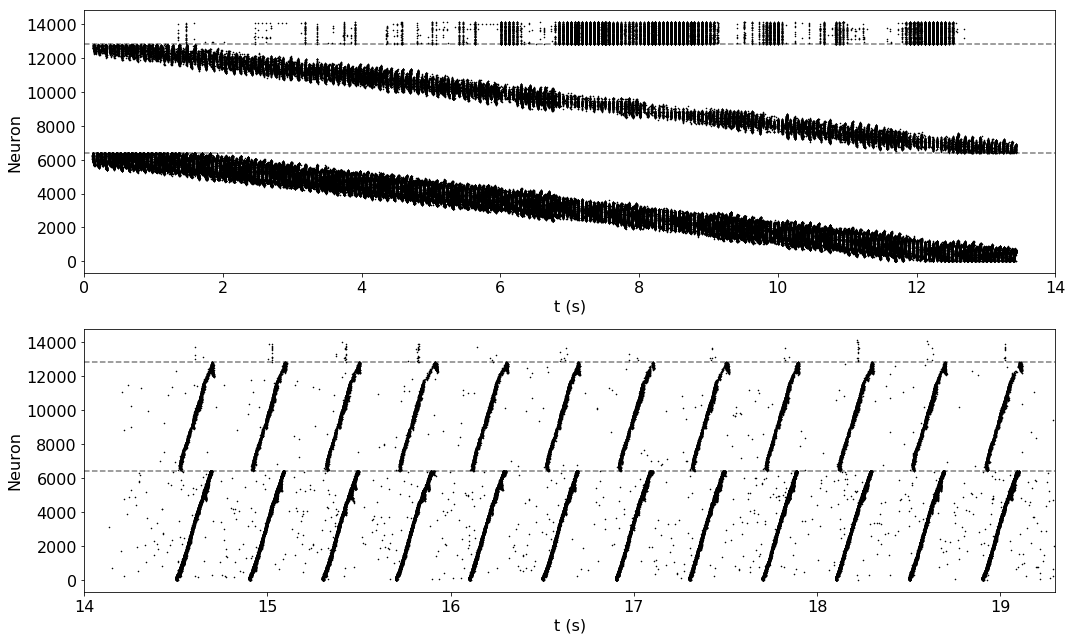

In [37]:
# make raster plot
fig, axs = raster(rsp.ts, rsp.spks, rsp.pfcs, rsp.cell_types, rsp.p, C, C_, fig_size=(15, 9), s=10)

In [31]:
cts = np.repeat('   ', len(rsp.cell_types))
cts[rsp.cell_types == 'P'] = 'PC'
cts[rsp.cell_types == 'I'] = 'INH'
rsp.cell_types = cts

In [32]:
cts[rsp.cell_types == 'P'] = 'PC'

In [33]:
cts[rsp.cell_types == 'I'] = 'INH'

In [34]:
rsp.cell_types = cts

In [35]:
rsp.cell_types

array(['PC', 'PC', 'PC', ..., 'INH', 'INH', 'INH'],
      dtype='<U3')